In [7]:
from IPython.display import clear_output

clear_output()

In [8]:
import pandas as pd

In [9]:
CONFIG = {
    "model" : {"model_name" : "distilbert/distilbert-base-uncased", "tokenizer" : "distilbert/distilbert-base-uncased"},
    "preprocessing" : True
}

# Prepare dataset

In [10]:
df = pd.read_csv("./data/train.csv")
df = df.rename(columns={"sentiment" : "label"})

mappings = {"positive" : 2, "neutral" : 1, "negative" : 0}

df["label"] = df["label"].map(mappings)

original_df = df

df = df.drop(['textID'], axis=1)

df


,text,selected_text,label
0,good luck with your auction,good luck with your auction,2
1,Hmm..You can`t judge a book by looking at its ...,Hmm..You can`t judge a book by looking at its ...,1
2,"Hello, yourself. Enjoy London. Watch out for ...",They`re mental.,0
3,We can`t even call you from belgium sucks,m suck,0
4,not so good mood..,not so good mood..,0
...,...,...,...
24727,Getting closer to logging in. My left hand is ...,worrying th,0
24728,I`m drawning in emails,I`m drawning in emails,1
24729,Oh Duh....I see that now .....thank you....,...than,2
24730,"my internet in like 9th grade was so fast, it...",dieing,0


In [11]:
# remove every puntuations from df["text"]
import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df["text"] = df["text"].apply(remove_punctuation)

df

,text,selected_text,label
0,good luck with your auction,good luck with your auction,2
1,HmmYou cant judge a book by looking at its cover,Hmm..You can`t judge a book by looking at its ...,1
2,Hello yourself Enjoy London Watch out for the...,They`re mental.,0
3,We cant even call you from belgium sucks,m suck,0
4,not so good mood,not so good mood..,0
...,...,...,...
24727,Getting closer to logging in My left hand is s...,worrying th,0
24728,Im drawning in emails,I`m drawning in emails,1
24729,Oh DuhI see that now thank you,...than,2
24730,my internet in like 9th grade was so fast its...,dieing,0


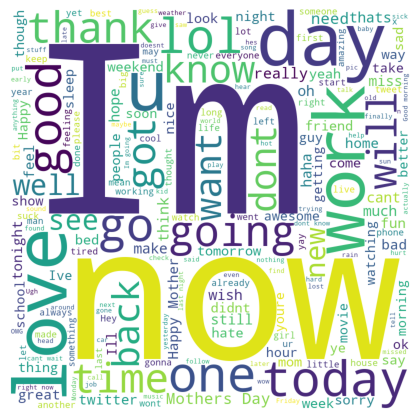

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = " ".join(df["text"])

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(text)

plt.figure(figsize = (4,4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

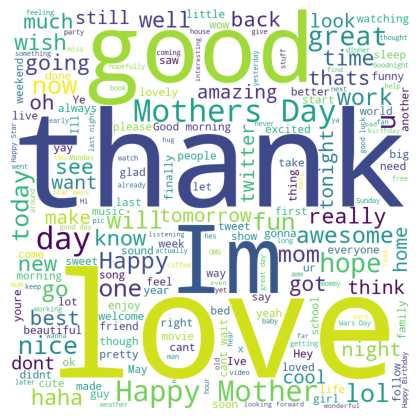

In [15]:
# do the same for positive and negative sentiments
positive_text = " ".join(df[df["label"] == 2]["text"])
negative_text = " ".join(df[df["label"] == 0]["text"])

positive_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(positive_text)

negative_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(negative_text)

plt.figure(figsize = (4,4), facecolor = None)
plt.imshow(positive_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

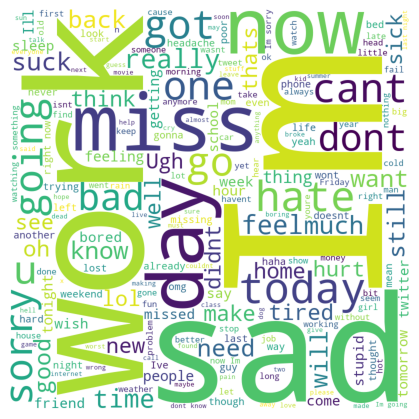

In [16]:
plt.figure(figsize = (4,4), facecolor = None)
plt.imshow(negative_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()